In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day25-normalization/wine_data.csv',header=None,usecols=[0,1,2])
data.columns=['class label','Alcohol','malic acid']
data.head()

,class label,Alcohol,malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [3]:
data.describe()

,class label,Alcohol,malic acid
count,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348
std,0.775035,0.811827,1.117146
min,1.000000,11.030000,0.740000
25%,1.000000,12.362500,1.602500
50%,2.000000,13.050000,1.865000
75%,3.000000,13.677500,3.082500
max,3.000000,14.830000,5.800000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   class label  178 non-null    int64  
 1   Alcohol      178 non-null    float64
 2   malic acid   178 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.3 KB


<Axes: xlabel='Alcohol', ylabel='Density'>

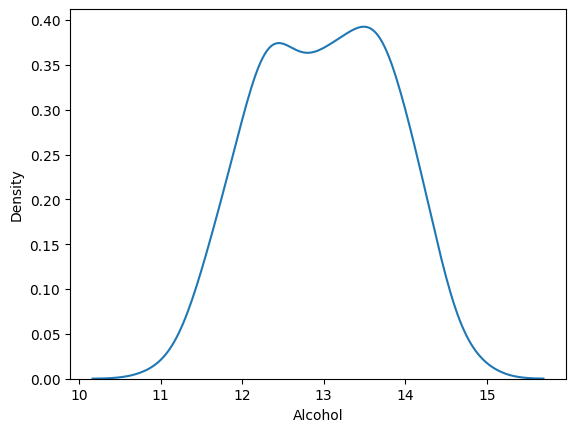

In [5]:
sns.kdeplot(data['Alcohol'])

<Axes: xlabel='malic acid', ylabel='Density'>

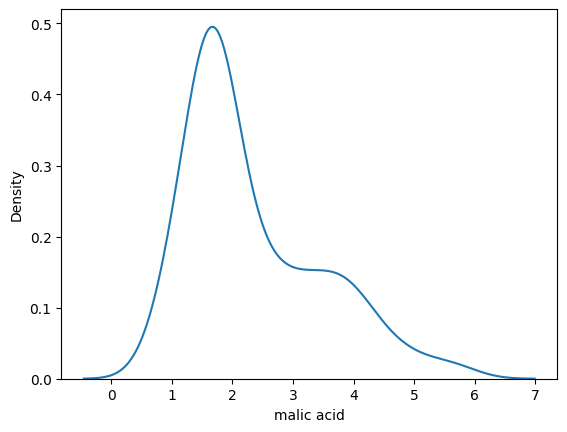

In [6]:
sns.kdeplot(data['malic acid'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6300\1585809513.py:1: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  sns.scatterplot(x=data['Alcohol'],y=data['malic acid'],hue=data['class label'],palette=sns.color_palette("Set1"))


<Axes: xlabel='Alcohol', ylabel='malic acid'>

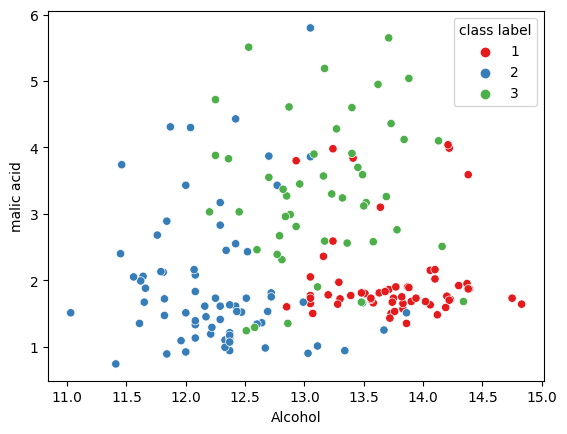

In [7]:
sns.scatterplot(x=data['Alcohol'],y=data['malic acid'],hue=data['class label'],palette=sns.color_palette("Set1"))

In [8]:
#split the dataset to dependent and independent variebles
x=data.drop('class label',axis=1)
y=data['class label']

In [9]:
x.shape,y.shape

((178, 2), (178,))

In [10]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.shape,x_test.shape

((142, 2), (36, 2))

In [11]:
#apply scaling
#min max scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [12]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x.columns)

In [13]:
np.round(x_train.describe())

,Alcohol,malic acid
count,142.0,142.0
mean,13.0,2.0
std,1.0,1.0
min,11.0,1.0
25%,12.0,2.0
50%,13.0,2.0
75%,14.0,3.0
max,15.0,6.0


In [14]:
np.round(x_test.describe())

,Alcohol,malic acid
count,36.0,36.0
mean,13.0,2.0
std,1.0,1.0
min,11.0,1.0
25%,12.0,2.0
50%,13.0,2.0
75%,13.0,3.0
max,15.0,5.0


In [15]:
np.round(x_train_scaled.describe())

,Alcohol,malic acid
count,142.0,142.0
mean,1.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,1.0,0.0
75%,1.0,0.0
max,1.0,1.0


In [16]:
np.round(x_test_scaled.describe())

,Alcohol,malic acid
count,36.0,36.0
mean,0.0,0.0
std,0.0,0.0
min,0.0,-0.0
25%,0.0,0.0
50%,0.0,0.0
75%,1.0,0.0
max,1.0,1.0


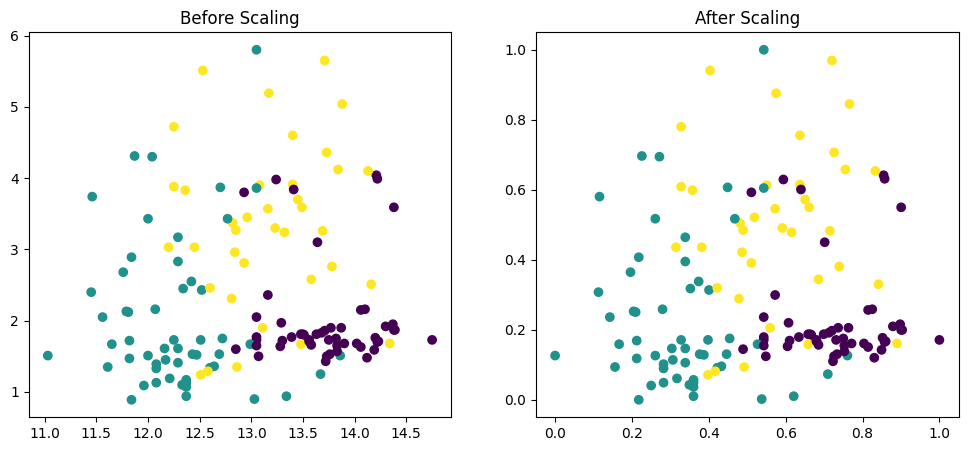

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train['Alcohol'], x_train['malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['Alcohol'], x_train_scaled['malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

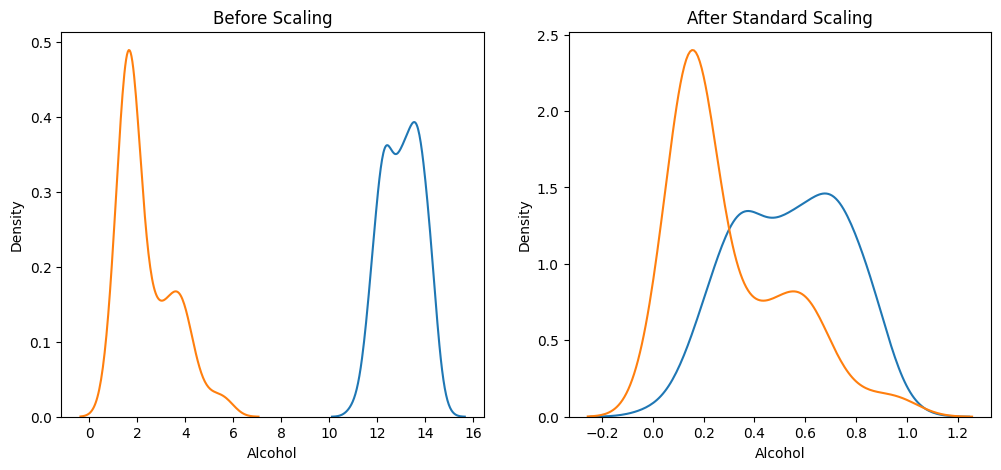

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Alcohol'], ax=ax1)
sns.kdeplot(x_train['malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(x_train_scaled['malic acid'], ax=ax2)
plt.show()